In [1]:
import pandas as pd
import numpy as np

In [2]:
df_final = pd.read_csv('./data/datosprocesados2.csv', delimiter=',', decimal='.', encoding='UTF-8')
df_final.head()

,IDDIST,cluster,res_platform,score,platform,polarity,num_score
0,14.0,4.0,2,5.0,2,5,0.8002
1,14.0,4.0,2,5.0,2,5,0.8888
2,14.0,4.0,2,1.0,2,1,0.9800
3,13.0,5.0,1,4.0,1,3,0.5998
4,13.0,5.0,1,5.0,1,5,0.5325


In [3]:
df_final = df_final.dropna(subset=['IDDIST', 'cluster'])
df_final = df_final.dropna()

In [4]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 698143 entries, 0 to 755065
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   IDDIST        698143 non-null  float64
 1   cluster       698143 non-null  float64
 2   res_platform  698143 non-null  int64  
 3   score         698143 non-null  float64
 4   platform      698143 non-null  int64  
 5   polarity      698143 non-null  int64  
 6   num_score     698143 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 42.6 MB


In [5]:
from sklearn.model_selection import train_test_split 

X = df_final.drop('score', axis=1)  
y = df_final['score']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

D:\Usuarios\jchata\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
17454/17454 ━━━━━━━━━━━━━━━━━━━━ 86s 5ms/step - accuracy: 0.5770 - loss: 0.9718 - val_accuracy: 0.5995 - val_loss: 0.9208
Epoch 2/50
17454/17454 ━━━━━━━━━━━━━━━━━━━━ 79s 5ms/step - accuracy: 0.5961 - loss: 0.9250 - val_accuracy: 0.6011 - val_loss: 0.9211
Epoch 3/50
17454/17454 ━━━━━━━━━━━━━━━━━━━━ 62s 4ms/step - accuracy: 0.5963 - loss: 0.9228 - val_accuracy: 0.6008 - val_loss: 0.9171
Epoch 4/50
17454/17454 ━━━━━━━━━━━━━━━━━━━━ 45s 3ms/step - accuracy: 0.5980 - loss: 0.9203 - val_accuracy: 0.6016 - val_loss: 0.9164
Epoch 5/50
17454/17454 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step - accuracy: 0.5986 - loss: 0.9183 - val_accuracy: 0.6008 - val_loss: 0.9156
Epoch 6/50
17454/17454 ━━━━━━━━━━━━━━━━━━━━ 47s 3ms/step - accuracy: 0.5978 - loss: 0.9184 - val_accuracy: 0.6014 - val_loss: 0.9168
Epoch 7/50
17454/17454 ━━━━━━━━━━━━━━━━━━━━ 44s 3ms/step - accuracy: 0.5975 - loss: 0.9198 - val_accuracy: 0.6021 - val_loss: 0.9170
Epoch 8/50
17454/17454 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step - accuracy: 

Epoch 50/50
17454/17454 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.5998 - loss: 0.9176 - val_accuracy: 0.6028 - val_loss: 0.9169


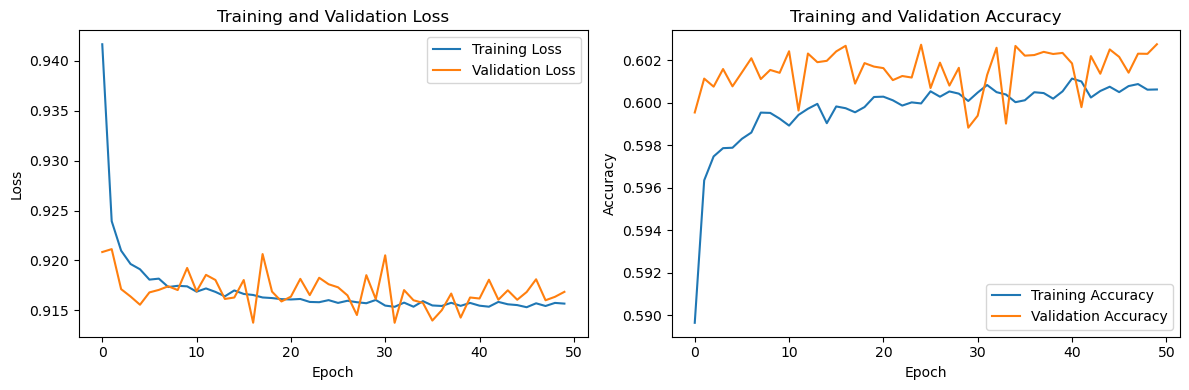

Test accuracy: 0.6028
4364/4364 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.60      0.60      6757
           1       0.39      0.06      0.10      5105
           2       0.41      0.45      0.43     16727
           3       0.53      0.20      0.29     39134
           4       0.65      0.90      0.76     71906

    accuracy                           0.60    139629
   macro avg       0.51      0.44      0.44    139629
weighted avg       0.58      0.60      0.55    139629


Confusion Matrix:
[[ 4062   227  1609    22   837]
 [ 1265   305  2610    69   856]
 [  743   217  7572  1740  6455]
 [  282    28  4877  7703 26244]
 [  416    12  1855  5102 64521]]


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Preprocesamiento
le = LabelEncoder()
df_final['IDDIST'] = le.fit_transform(df_final['IDDIST'])
df_final['cluster'] = le.fit_transform(df_final['cluster'])
df_final['res_platform'] = le.fit_transform(df_final['res_platform'])
df_final['platform'] = le.fit_transform(df_final['platform'])

# Separa características y variable objetivo
X = df_final[['IDDIST', 'cluster', 'res_platform', 'platform', 'polarity', 'num_score']]
y = df_final['score']

# Normaliza las características
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Codifica la variable objetivo
le_y = LabelEncoder()
y = le_y.fit_transform(y)
y = to_categorical(y)

# Divide en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea el modelo
model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(y.shape[1], activation='softmax')  # Ajustamos el número de neuronas de salida
])

# Compila el modelo
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrena el modelo
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_data=(X_test, y_test),
                    verbose=1)

# Muestra resultados de loss y accuracy por epoch
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Evalua el modelo
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {accuracy:.4f}")

# Realiza predicciones
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Imprime el reporte de clasificación
print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes))

# Imprime la matriz de confusión
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_classes, y_pred_classes))